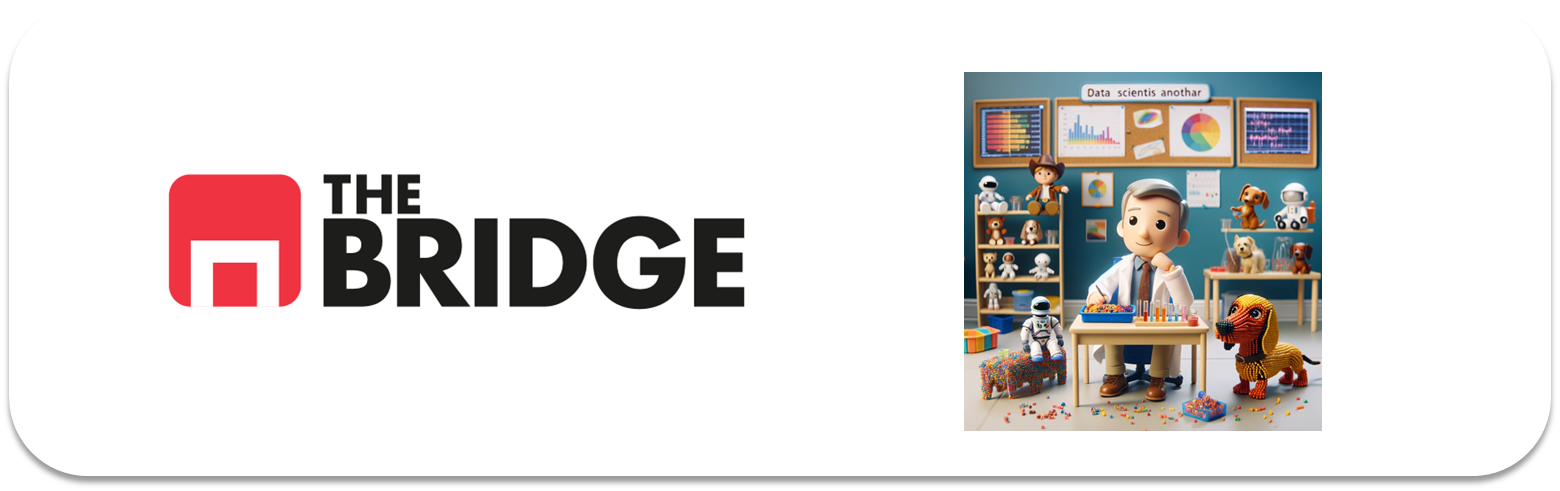

## PRACTICA OBLIGATORIA: ANÁLISIS UNIVARIANTE

* La práctica obligatoria de esta unidad consiste en hacer el análisis univariante completo de un dataset con el que acabarás muy familiarizado, el manifiesto de pasajeros del Titanic. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook. Te dejo una que vas a necesitar sí o sí

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np





### #1 Preparación


### #1.1


Carga en un dataframe los datos del titanic a partir de un dataset de seaborn. Para ello:

* ejecuta ```python sns.get_dataset_names()```
* localiza el nombre que puede ser el adecuado para el ejercicio
* Asigna la salida de ```sns.load_dataset(<nombre_del_dataset>)``` a una variable "df_titanic"

In [3]:
# Listar los datasets disponibles en seaborn
sns.get_dataset_names()

# Cargar el dataset de Titanic
df_titanic = sns.load_dataset('titanic')


### #1.2

Muestra una porción del dataset ("df_titanic") y su info general. ¿Hay nulos?

In [4]:
# Ver las primeras filas del dataset
print(df_titanic.head())

# Obtener información general sobre el dataset
print(df_titanic.info())


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-nu

### #1.3

Obtén el porcentaje de nulos y decide que hacer con las columnas con nulos y ejecútalo. Además deshazte de la columna "parch" que no la emplearemos.

In [5]:
# Verificar los porcentajes de valores nulos
print(df_titanic.isnull().mean() * 100)


survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64


### #1.4
Sobre el dataset "limpio". Rellena la tabla de descripción (muy breve) de lo que es cada columna en función de su nombre y los valores. Para ayudarte:
* Se trata del dataset que reune lo más parecido a un manifiesto de supervivientes y fallecidos en el viaje.
* sibsp: Es el numero de familiares que viajan con la persona indicada en el manifiesto (lista de pasajeros)
* embarked: Es la incial de la letra de la ciudad donde embarcó la persona.




| Columna/Variable | Descripción |
| ---------------- | ----------- |
| -       | - |



### #1.5

Busca en internet las tres ciudades que visitó el Titanic antes de poner rumbo a su destino y llegar a alta mar. Cambia las iniciales por esos valores.

In [7]:
# Reemplazar las iniciales con los nombres completos de las ciudades
df_titanic['embarked'] = df_titanic['embarked'].map({'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'})
print(df_titanic)

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500      NaN   Third   
1           1       1  female  38.0      1      0  71.2833      NaN   First   
2           1       3  female  26.0      0      0   7.9250      NaN   Third   
3           1       1  female  35.0      1      0  53.1000      NaN   First   
4           0       3    male  35.0      0      0   8.0500      NaN   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000      NaN  Second   
887         1       1  female  19.0      0      0  30.0000      NaN   First   
888         0       3  female   NaN      1      2  23.4500      NaN   Third   
889         1       1    male  26.0      0      0  30.0000      NaN   First   
890         0       3    male  32.0      0      0   7.7500      NaN   Third   

       who  adult_male deck  embark_town alive  alo

### #2 Análisis

Sabiendo que el objetivo de nuestro análisis es hacer un estudio de la superviviencia y mortalidad en el viaje... Haz un análisis univariante completo y ordenado de las siguientes variables:
["survived","who","age","fare","class","embarked","alone"]
Nota: Si quieres añadir más, perfecto.

Separa el análisis en categóricas (incluyendo binarias) y numéricas. Muestra valores, gráficas y conclusiones/observaciones (2 o 3 por variable)

### #2.1 Categóricas

Frecuencias de la variable survived:
survived
0    549
1    342
Name: count, dtype: int64




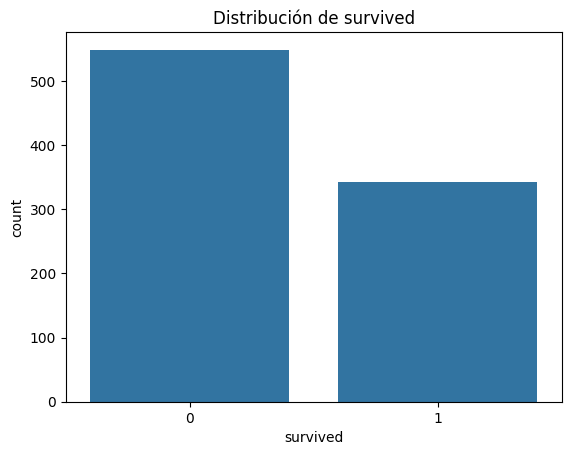

Frecuencias de la variable who:
who
man      537
woman    271
child     83
Name: count, dtype: int64




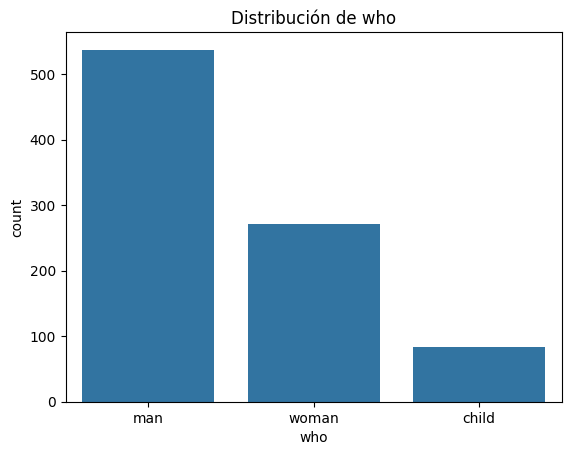

Frecuencias de la variable embarked:
Series([], Name: count, dtype: int64)




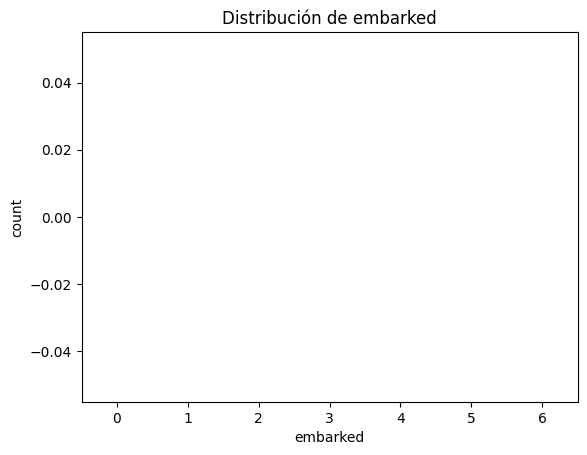

Frecuencias de la variable pclass:
pclass
3    491
1    216
2    184
Name: count, dtype: int64




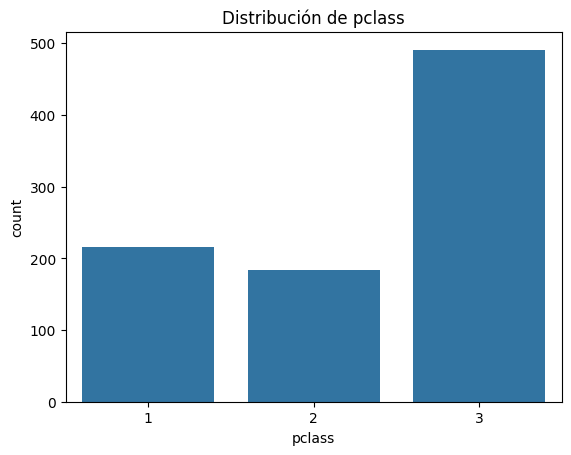

Frecuencias de la variable alone:
alone
True     537
False    354
Name: count, dtype: int64




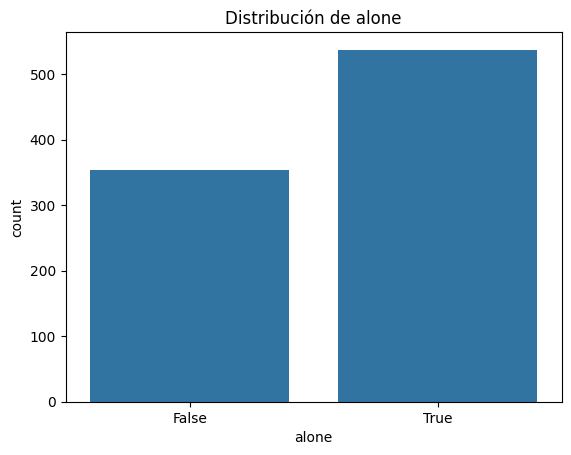

In [8]:
# Análisis de las variables categóricas
categorical_columns = ['survived', 'who', 'embarked', 'pclass', 'alone']

for column in categorical_columns:
    print(f"Frecuencias de la variable {column}:")
    print(df_titanic[column].value_counts())
    print("\n")

    # Gráfico de barras para cada variable categórica
    sns.countplot(x=column, data=df_titanic)  # aqui estamos utilizando un metodo de seaborn para que nos cuente el numero de ocurrencias 
                                                # unicas que hay en cada categoria en una columna
    plt.title(f"Distribución de {column}")
    plt.show()


### #2.2 Numéricas

Estadísticas descriptivas de age:
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64




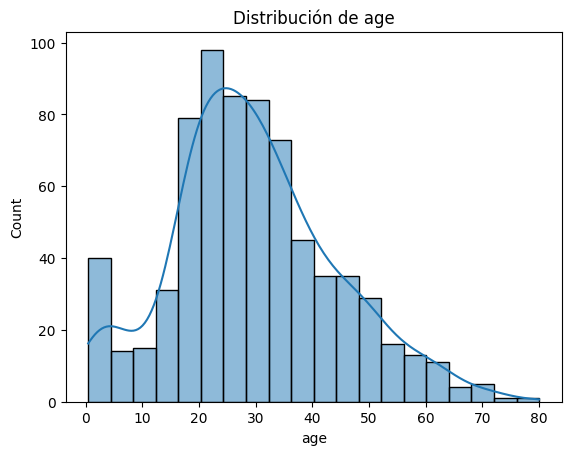

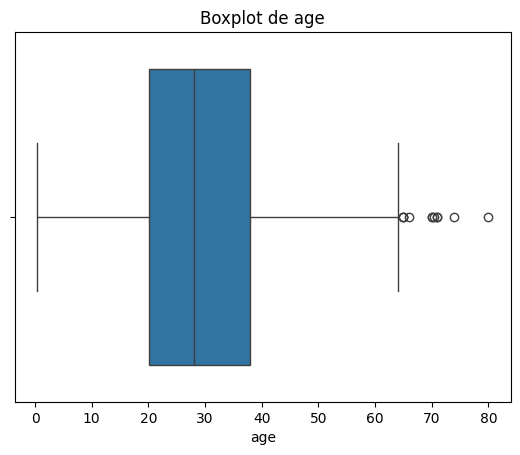

Estadísticas descriptivas de fare:
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64




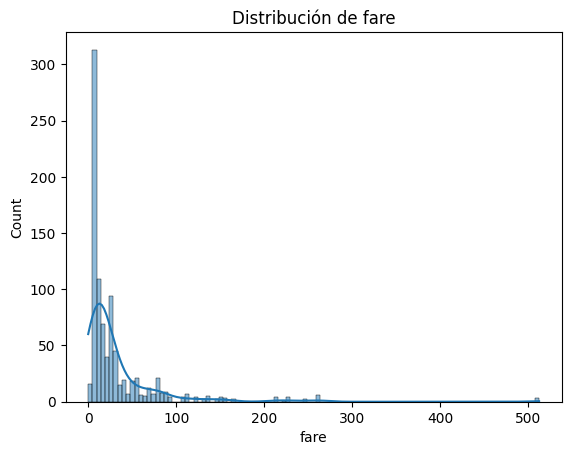

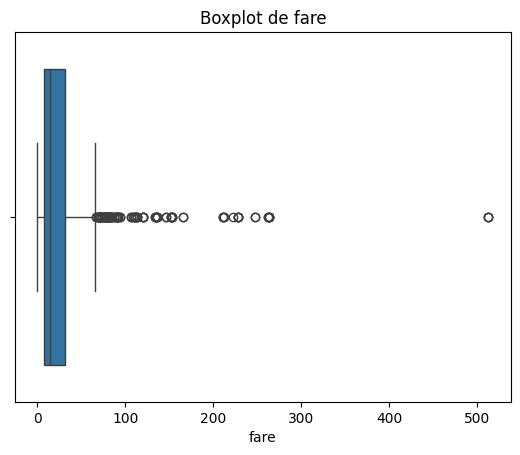

In [9]:
# Análisis de las variables numéricas
numeric_columns = ['age', 'fare']

for column in numeric_columns:
    print(f"Estadísticas descriptivas de {column}:")
    print(df_titanic[column].describe())
    print("\n")

    # Histograma
    sns.histplot(df_titanic[column], kde=True)
    plt.title(f"Distribución de {column}")
    plt.show()

    # Boxplot
    sns.boxplot(x=df_titanic[column])
    plt.title(f"Boxplot de {column}")
    plt.show()
